In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [30]:
def evaluate_xgboost_model(model, X_train, X_test, y_train, y_test, cv=5):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
    from sklearn.metrics import log_loss, balanced_accuracy_score, confusion_matrix, classification_report
    from sklearn.model_selection import learning_curve
    from sklearn.metrics import roc_curve, auc
    from xgboost import XGBClassifier, DMatrix
    from sklearn.model_selection import learning_curve
    import numpy as np

    # Convert data to DMatrix if not already
    if not isinstance(X_train, DMatrix):
        X_train = DMatrix(X_train, label=y_train)
        X_test = DMatrix(X_test, label=y_test)

    # Convert the booster object to XGBClassifier for compatibility with learning_curve
    xgb_clf = XGBClassifier()
    xgb_clf._Booster = model

    # Make predictions
    y_pred_proba = model.predict(X_test)
    y_pred_binary = (y_pred_proba > 0.5).astype(int)

    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    average_precision = average_precision_score(y_test, y_pred_proba)
    mcc = matthews_corrcoef(y_test, y_pred_binary)
    logloss = log_loss(y_test, y_pred_binary)
    balanced_acc = balanced_accuracy_score(y_test, y_pred_binary)
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    class_report = classification_report(y_test, y_pred_binary)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-ROC:", roc_auc)
    print("AUC-PR (Average Precision):", average_precision)
    print("Matthew's Correlation Coefficient (MCC):", mcc)
    print("Log Loss:", logloss)
    print("Balanced Accuracy:", balanced_acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

    # Plot learning curve

    train_sizes, train_scores, test_scores = learning_curve(
        xgb_clf, X_train, y_train, cv=cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy', n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()

# Example usage:
# evaluate_xgboost_model(xgb_model, X_train, X_test, y_train, y_test)


In [25]:
train_df = pd.read_csv("train10k.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9602 entries, 0 to 9601
Columns: 1615 entries, name to mZagreb2
dtypes: float64(1279), int64(335), object(1)
memory usage: 118.3+ MB


In [26]:
train_df = train_df.fillna(0)
train_df = train_df.drop('name', axis=1)

In [27]:
from sklearn.model_selection import train_test_split
Y = train_df[['cls']].copy()
X = train_df.drop(['cls'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert the data into DMatrix format, which is a data structure used by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [28]:
# Set XGBoost parameters
params = {
    'objective': 'binary:logistic', 
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'eval_metric': 'logloss'  
}

Accuracy: 0.8178032274856846
Precision: 0.8490566037735849
Recall: 0.7814096016343207
F1-Score: 0.8138297872340426
AUC-ROC: 0.8928100514195125
AUC-PR (Average Precision): 0.9050179275920092
Matthew's Correlation Coefficient (MCC): 0.6381433428449619
Log Loss: 6.567037317121814
Balanced Accuracy: 0.8185179642991136
Confusion Matrix:
[[806 136]
 [214 765]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       942
           1       0.85      0.78      0.81       979

    accuracy                           0.82      1921
   macro avg       0.82      0.82      0.82      1921
weighted avg       0.82      0.82      0.82      1921



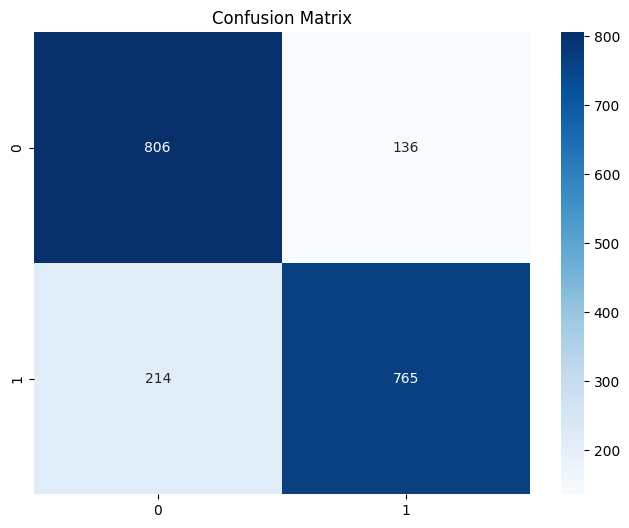

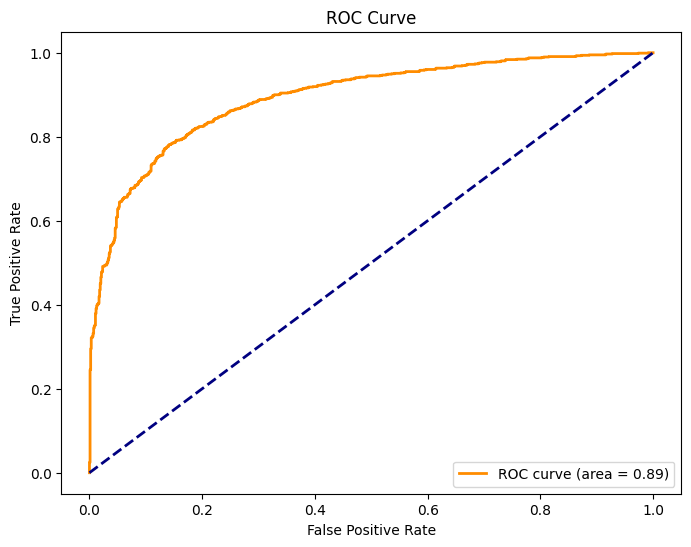

InvalidParameterError: The 'X' parameter of learning_curve must be an array-like or a sparse matrix. Got <xgboost.core.DMatrix object at 0x00000250FB840E50> instead.

In [31]:
# Train the XGBoost model
num_rounds = 120
model = xgb.train(params, dtrain, num_rounds)

y_pred = model.predict(dtest)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

evaluate_xgboost_model(model,X_train, X_test, y_train.T.values[0], y_test)

